# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [4]:
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins

# Load and view the dataset
penguins = load_penguins()
print(penguins.head())
penguins.dropna(subset= ['bill_depth_mm'], inplace=True)



  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

features = penguins.drop(columns=['bill_depth_mm'])
target = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

numeric_features = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year']
categorical_features = ['species', 'island', 'sex']

numeric_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder()
)

preprocessor = make_column_transformer(
    (numeric_pipeline, numeric_features),
    (categorical_pipeline, categorical_features)
)

model_pipeline = make_pipeline(preprocessor, LinearRegression())

model_pipeline.fit(X_train, y_train)

predictions = model_pipeline.predict(X_test)
mse_value = mean_squared_error(y_test, predictions)
print(f"MSE: {mse_value}")


MSE: 0.563034326107134


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


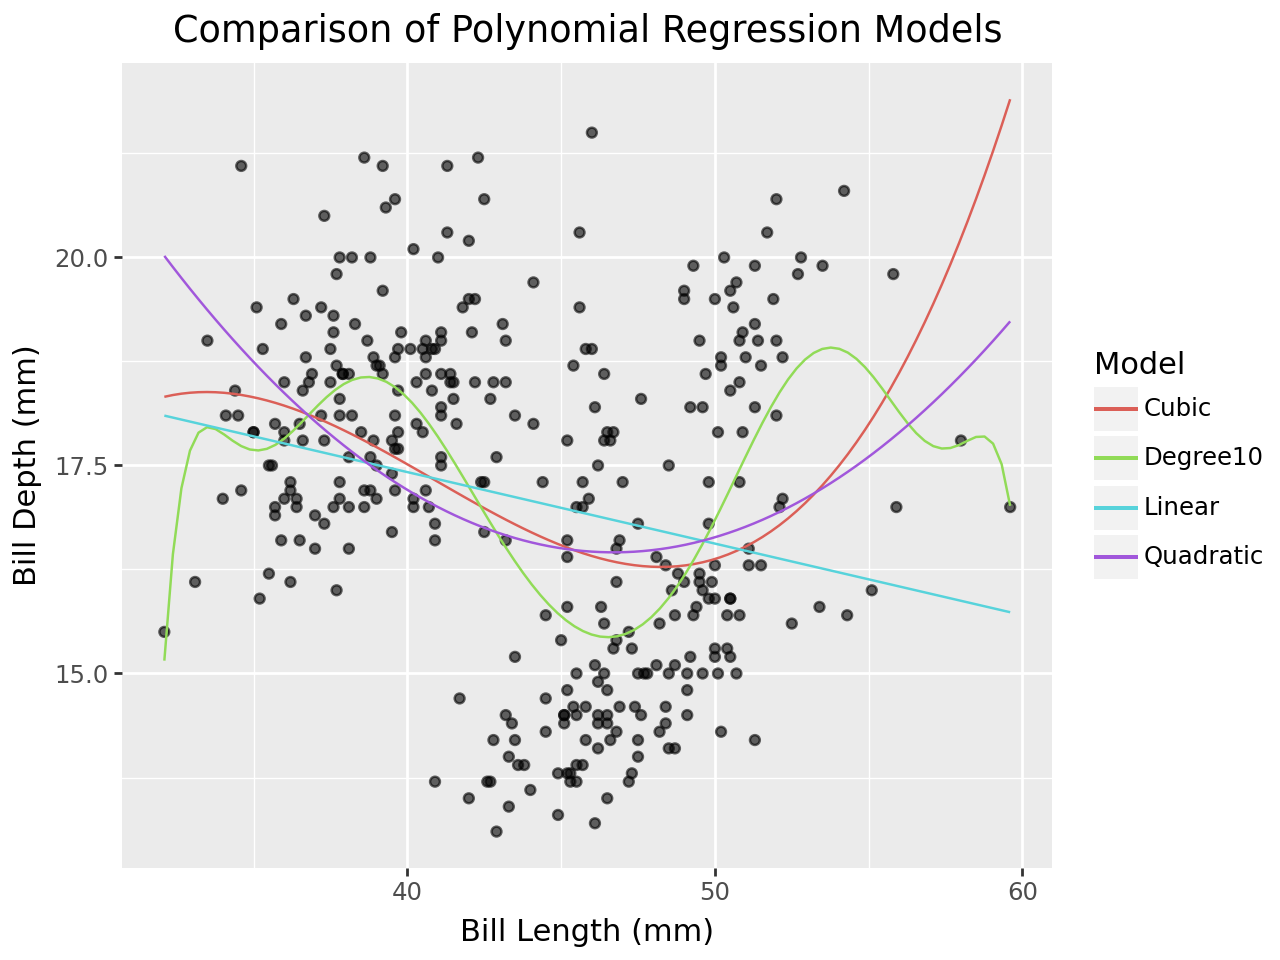

In [7]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, labs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

input_feature = penguins[['bill_length_mm']]
target_variable = penguins['bill_depth_mm']

train_X, test_X, train_y, test_y = train_test_split(input_feature, target_variable, test_size=0.25, random_state=42)

polynomial_models = {
    "Linear": make_pipeline(StandardScaler(), LinearRegression()),
    "Quadratic": make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression()),
    "Cubic": make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearRegression()),
    "Degree10": make_pipeline(StandardScaler(), PolynomialFeatures(degree=10), LinearRegression())
}

x_values = np.linspace(input_feature['bill_length_mm'].min(), input_feature['bill_length_mm'].max(), 100).reshape(-1, 1)
model_predictions = pd.DataFrame({"bill_length_mm": x_values.flatten()})

for model_name, polynomial_model in polynomial_models.items():
    polynomial_model.fit(train_X, train_y)
    model_predictions[model_name] = polynomial_model.predict(x_values)

model_predictions_long = model_predictions.melt(id_vars="bill_length_mm",
                                                var_name="Model",
                                                value_name="Predicted_bill_depth_mm")

scatter_data = pd.DataFrame({"bill_length_mm": input_feature['bill_length_mm'], "bill_depth_mm": target_variable})

(
    ggplot(scatter_data, aes(x="bill_length_mm", y="bill_depth_mm")) +
    geom_point(color="black", alpha=0.6) +
    geom_line(model_predictions_long, aes(x="bill_length_mm", y="Predicted_bill_depth_mm", color="Model")) +
    labs(title="Comparison of Polynomial Regression Models",
         x="Bill Length (mm)",
         y="Bill Depth (mm)")
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The blue (linear) model is underfitting b/c it misses the non linear relationship of the two variables. The green (degree 10) overfits as it follows the noise too closely, not the real trends. The cubic (red) is a close second but it looks to be too complicated in certain sections of the model. The purple (quadratic model) is the one I would pick because it captures the trends without excesive complexity.